In [1]:
import pandas as pd
import numpy as np
weather_csv =  pd.read_csv("data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
weather_csv.head()

In [91]:
# working with data
dates = pd.DatetimeIndex(weather_csv["Date"])
filter_ = (dates.month == 2) & (dates.day == 29)
# deleting 29 feb
filtered_weather = weather_csv[~filter_]
# yield warning, but it can be ignored because it is false-positive
filtered_weather.loc[:,"Date"] = pd.to_datetime(filtered_weather["Date"])
years = filtered_weather["Date"].dt.year
date_filter = (years >= 2005) & (years <= 2014)
df_2005_2014 = filtered_weather[date_filter]
df_2005_2014["Month"] = df_2005_2014["Date"].dt.month
df_2005_2014["Day"] = df_2005_2014["Date"].dt.day
# 2015
date_filter_2015 = years == 2015
df_2015 = filtered_weather[date_filter_2015]
df_2015["Month"] = df_2015["Date"].dt.month
df_2015["Day"] = df_2015["Date"].dt.day
# max and min vals
max_values = df_2005_2014[df_2005_2014["Element"] == "TMAX"].groupby(["Month", "Day"]).agg(np.max)
min_values = df_2005_2014[df_2005_2014["Element"] == "TMIN"].groupby(["Month", "Day"]).agg(np.min)

max_values_2015 = df_2015[df_2015["Element"] == "TMAX"].groupby(["Month", "Day"]).agg(np.max)
min_values_2015  = df_2015[df_2015["Element"] == "TMIN"].groupby(["Month", "Day"]).agg(np.min)

# convert to normal units (C)
max_values["Data_Value"] = max_values["Data_Value"] * 0.1
min_values["Data_Value"] = min_values["Data_Value"] * 0.1
max_values_2015["Data_Value"] = max_values_2015["Data_Value"] * 0.1
min_values_2015["Data_Value"] = min_values_2015["Data_Value"] * 0.1
# determinate when in 2015 records was broken
printed_max_values_2015 = max_values_2015[max_values_2015["Data_Value"] > max_values["Data_Value"]]
printed_min_values_2015 = min_values_2015[min_values_2015["Data_Value"] < min_values["Data_Value"]]


Month  Day
1      1     2015-01-01
       2     2015-01-02
       3     2015-01-03
       4     2015-01-04
       5     2015-01-05
                ...    
12     27    2015-12-27
       28    2015-12-28
       29    2015-12-29
       30    2015-12-30
       31    2015-12-31
Name: Date, Length: 365, dtype: datetime64[ns]


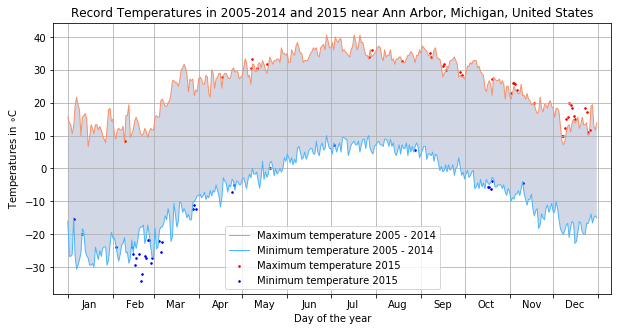

In [135]:
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

date_list = pd.to_datetime(max_values_2015["Date"].unique())
fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (10,5) ) 
ax.set_title('Record Temperatures in 2005-2014 and 2015 near Ann Arbor, Michigan, United States')
ax.set_ylabel('Temperatures in ${\circ}$C')
ax.set_xlabel('Day of the year')
ax.yaxis.grid()
ax.xaxis.grid()
# set limits to xaxis. Created a small indent of 10 days
xmin, xmax = date_list[0] - datetime.timedelta(days= 10), date_list[-1] + datetime.timedelta(days= 10)
xmin = np.datetime64(xmin)
xmax = np.datetime64(xmax)
# xmin, xmax = date_list[0], date_list[-1]
ax.set_xlim(xmin, xmax)
ax.plot(date_list, max_values["Data_Value"].values,linewidth = 1, color="#FB8F67", label= "Maximum temperature 2005 - 2014") 
ax.plot(date_list, min_values["Data_Value"].values,linewidth = 1,  color="#49B6FF", label= "Minimum temperature 2005 - 2014")
center_ticks(ax)
plt.fill_between(date_list,max_values["Data_Value"], min_values["Data_Value"], facecolor='#909CC2',
                 alpha=0.4)
ax.scatter(printed_max_values_2015["Date"], printed_max_values_2015["Data_Value"], c="r", s=10, marker=".", label= "Maximum temperature 2015")
ax.scatter(printed_min_values_2015["Date"], printed_min_values_2015["Data_Value"], c="b", s=10, marker=".",  label= "Minimum temperature 2015")
plt.legend()
plt.savefig("output.png", format="png", dpi=200)

In [96]:
import numpy as np
import matplotlib
import matplotlib.ticker as ticker

def center_ticks(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
# 16 is a slight approximation since months differ in number of days.
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator(bymonthday=16))
    
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
    
    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('center')
            
